In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv('FFChallenge/background.csv')
outcomes = pd.read_csv('FFChallenge/train.csv')

/Users/aarshay/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10025,10029,10032,10575,10578,10592,10607,10616,10631,10640,10655,10693,10712,10716,10740,10782,10787,10791,10796,10833,10865,10999,11030,11043,11127,11128,11234,11258,11282,11309,11310,11384,11394,11408,11409,11411,11412,11438,11441,11485,11490,11504,11508,11511,11514,11520,11527,11533,11539,11545,11546,11624,11629,11658,11672,11673,11678,11679,11680,11719,11721,11934,12160,12166,12168,12177,12183,12189,12199,12201,12203,12205,12216,12217,12228,12229,12239,12300,12316,12358,12367,12375,12402,12404,12408,12451,12453,12465,12467,12475,12481,12483,12496,12498,12520,12530,12531,12541,12599,12607,12623,12638,12650,12651,12663,12668,12715,12717,12735,12736,12758,12762,12772,12781,12788,12800,12801) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(4242, 12943)

In [4]:
outcomes.shape

(2121, 7)

In [5]:
outcomes.describe()

,challengeID,gpa,grit,materialHardship,eviction,layoff,jobTraining
count,2121.000000,1165.000000,1418.000000,1459.000000,1459.000000,1277.000000,1461.000000
mean,2085.421971,2.866738,3.427539,0.103745,0.059630,0.209084,0.234771
std,1209.429502,0.665322,0.485130,0.155665,0.236881,0.406814,0.424001
min,1.000000,1.000000,1.250000,0.000000,0.000000,0.000000,0.000000
25%,1032.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,2110.000000,3.000000,3.500000,0.000000,0.000000,0.000000,0.000000
75%,3109.000000,3.250000,3.750000,0.181818,0.000000,0.000000,0.000000
max,4241.000000,4.000000,4.000000,0.818182,1.000000,1.000000,1.000000


In [174]:
outcomes = outcomes[['gpa','grit']].dropna()

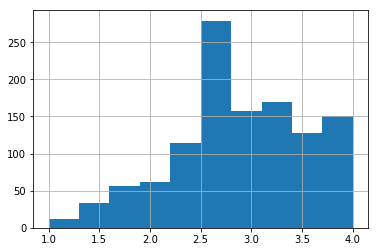

In [175]:
outcomes['gpa'].hist(bins=10)

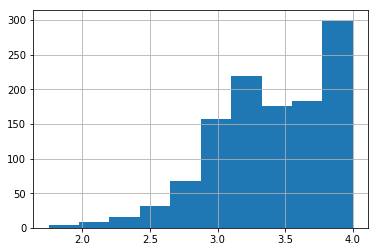

In [176]:
outcomes['grit'].hist()

In [183]:
outcomes.corr()

,gpa,grit
gpa,1.000000,0.207507
grit,0.207507,1.000000


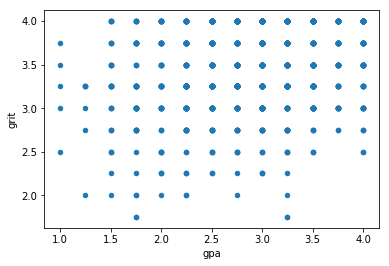

In [184]:
outcomes.plot(x='gpa',y='grit',kind='scatter')

In [7]:
# pd.Series(data.columns.sort_values()).to_csv('FFChallenge/columns.csv',index=False)

In [142]:
sum([1 if x.startswith('cm') or x.startswith('cf') else 0 for x in data.columns])

336

In [143]:
features = [x for x in data.columns if x.startswith('cm') or x.startswith('cf')]

In [144]:
data[features].apply(lambda x: sum(x.isnull())).sort_values(ascending=False).to_csv('FFChallenge/missing_values.csv')

In [18]:
variable_list = pd.read_csv('FFChallenge/feature_details.csv')

In [19]:
variable_list

,source,source_mod,variables
0,Interview Flags,interview_flags,cm1twoc cm2twoc cm3twoc cm4twoc cf1twoc cf2two...
1,Sample Flags,sample_flags,cm2samp cm3samp cm4samp cf2samp cf3samp cf4sam...
2,Parents & Children,parents_children,cm1age cm2age cm3age cm4age cf1age cf2age cf3a...
3,Relationships,relationship,cm1relf cm2relf cm3relf cm4relf cm1marf cm2mar...
4,Incarceration,incarceration,cm1finjail cm2finjail cm3finjail cm4finjail cf...
5,Current Partner,current_partner,cm2marp cm3marp cm4marp cf2marp cf3marp cf4mar...
6,Demographic & Household Composition,demographics,cm1adult cm2adult cm3adult cm4adult cf1adult c...
7,CIDI,cidi,cm3alc_case cf3alc_case cm3drug_case cf3drug_c...
8,Household Income & Poverty,income,cm1hhinc cm2hhinc cm3hhinc cm4hhinc cf1hhinc c...
9,Cognitive Ability,cognitive_ability,cm3cogsc cf3cogsc


find the following:
* unique tokens
* starting with m only
* m -> f combo
* starting f only
* f -> m combo

In [20]:
import re

In [41]:
def split_mf(x):
    d = {
        'm': set(),
        'f': set(),
        'mf': set(),
        'fm': set()
    }
    vals = [i[1:] for i in x.split(' ')]
#     re.split(r'[1234]',x)
    for x in vals:
        start = x[0]
        mid = x[2]
        if (start=='m' and mid=='f')or(start=='f' and mid=='m'):
            d['%s%s'%(start,mid)].add(x[3:])
        else:
            d['%s'%(start)].add(x[2:])
    return d

In [42]:
variable_list['map'] = variable_list['variables'].apply(split_mf)

In [43]:
variable_list

,source,source_mod,variables,map
0,Interview Flags,interview_flags,cm1twoc cm2twoc cm3twoc cm4twoc cf1twoc cf2two...,"{'m': {'inhom', 'tdiff', 'inccprov', 'mint', '..."
1,Sample Flags,sample_flags,cm2samp cm3samp cm4samp cf2samp cf3samp cf4sam...,"{'m': {'natsm', 'citsm', 'samp', 'natsmx'}, 'f..."
2,Parents & Children,parents_children,cm1age cm2age cm3age cm4age cf1age cf2age cf3a...,"{'m': {'age', 'lbw', 'bsex', 'b_age', 'numb'},..."
3,Relationships,relationship,cm1relf cm2relf cm3relf cm4relf cm1marf cm2mar...,"{'m': {'alvf', 'relf', 'cohf', 'amrf', 'stflg'..."
4,Incarceration,incarceration,cm1finjail cm2finjail cm3finjail cm4finjail cf...,"{'m': {'1finjail', '2finjail', '2fevjail', '3f..."
5,Current Partner,current_partner,cm2marp cm3marp cm4marp cf2marp cf3marp cf4mar...,"{'m': {'cohp', 'marp'}, 'f': {'cohp'}, 'mf': {..."
6,Demographic & Household Composition,demographics,cm1adult cm2adult cm3adult cm4adult cf1adult c...,"{'m': {'gdad', 'ethrace', 'adult', 'biok', 'gm..."
7,CIDI,cidi,cm3alc_case cf3alc_case cm3drug_case cf3drug_c...,"{'m': {'gad_case', 'drug_case', 'md_case_con',..."
8,Household Income & Poverty,income,cm1hhinc cm2hhinc cm3hhinc cm4hhinc cf1hhinc c...,"{'m': {'povca', 'hhinc', 'hhimp', 'povco', 'in..."
9,Cognitive Ability,cognitive_ability,cm3cogsc cf3cogsc,"{'m': {'cogsc'}, 'f': {'cogsc'}, 'mf': {}, 'fm..."


In [59]:
feat_mappings = pd.concat([pd.DataFrame(pd.Series(variable_list['map'][i])).transpose() for i in range(variable_list.shape[0])],ignore_index=True)

In [62]:
variable_list = pd.concat([variable_list,feat_mappings],axis=1)

In [64]:
variable_list.to_csv('FFChallenge/feature_map.csv',index=False)

# exploration


In [181]:
def view_var(data,x,year=[1,2,3,4],print_counts=False):
    col = []
    for t in x:
        col.extend([i for i in data.columns if t in i])
    print('cols found: %s'%col)
    if not print_counts:
        print(data[col].head(50))
    else:
        for x in col:
#             print('value counts for variable %s'%col)
            print(data[x].value_counts())

In [253]:
view_var(data,['case_'],print_counts=True)

cols found: ['cm2md_case_con', 'cm2md_case_lib', 'cf2md_case_con', 'cf2md_case_lib', 'cm3md_case_con', 'cm3md_case_lib', 'cf3md_case_con', 'cf3md_case_lib', 'cm4md_case_con', 'cm4md_case_lib', 'cf4md_case_con', 'cf4md_case_lib', 'cm5md_case_con', 'cm5md_case_lib', 'cf5md_case_con', 'cf5md_case_lib', 'cn5md_case_con', 'cn5md_case_lib']
 0    3318
 1     467
-9     455
-3       2
Name: cm2md_case_con, dtype: int64
 0    3186
 1     599
-9     455
-3       2
Name: cm2md_case_lib, dtype: int64
 0    2671
-9    1304
 1     264
-3       3
Name: cf2md_case_con, dtype: int64
 0    2610
-9    1304
 1     325
-3       3
Name: cf2md_case_lib, dtype: int64
 0    3145
-9     578
 1     511
-3       8
Name: cm3md_case_con, dtype: int64
 0    2924
 1     732
-9     578
-3       8
Name: cm3md_case_lib, dtype: int64
 0    2631
-9    1343
 1     261
-3       7
Name: cf3md_case_con, dtype: int64
 0    2481
-9    1343
 1     411
-3       7
Name: cf3md_case_lib, dtype: int64
 0    3188
-9     647
 1     39

In [267]:
col = [x for x in data.columns if x.endswith('c2') and x.startswith('m')]
view_var(data,col,print_counts=True)

cols found: ['m1c2', 'm1c2a', 'm1e1c2', 'm2b5c2', 'm2c2', 'm2c2a', 'm2c2b1', 'm2c2b2', 'm2c2e', 'm2c2f', 'm2c2g', 'm2c20', 'm2c20a', 'm2c20b', 'm2c20b1', 'm2c20p', 'm2c21', 'm2c21a', 'm2c21a1', 'm2c22', 'm2c23a', 'm2c23b', 'm2c23c', 'm2c23d', 'm2c23e', 'm2c23f', 'm2c24', 'm2c24a', 'm2c24b', 'm2c24c', 'm2c25', 'm2c25a', 'm2c25a1', 'm2c26', 'm2c27', 'm2c27a', 'm2c27b', 'm2c27c', 'm2c27cp', 'm2c28', 'm2c29', 'm2c29a', 'm2c29b', 'm2f2c2', 'm2h9c2', 'm2h10c2', 'm2j13c2', 'm3a4c2', 'm3c2', 'm3c2a', 'm3c2b1', 'm3c2b2', 'm3c2c', 'm3c2d', 'm3c2e', 'm3c20', 'm3c20a', 'm3c20b', 'm3c20c', 'm3c20d', 'm3c21', 'm3c21a', 'm3c21b', 'm3c21c', 'm3c21d_1', 'm3c21d_2', 'm3c21d_3', 'm3c21d_4', 'm3c21d_5', 'm3c21d_6', 'm3c21d_7', 'm3c21d_8', 'm3c21d_9', 'm3c22', 'm3c22a', 'm3c22b', 'm3c23', 'm3c24', 'm3c24p', 'm3c25', 'm3c26', 'm3c26a', 'm3c27', 'm3c28', 'm3c29', 'm3c29a', 'm3c29b', 'm3c29c', 'm3c42c2', 'm3e2c2', 'm3f2c2', 'm3i8c2', 'm3i31c2', 'm3j18c2', 'm4a4c2', 'm4a10c2', 'm4c2', 'm4c2a', 'm4c2b1', 'm4c2b

In [248]:
col = [x for x in data.columns if x.endswith('c5')]
view_var(data,col,print_counts=True)

cols found: ['m1e1c5', 'f1e1c5', 'm2c5', 'm2c5a', 'm2c5b', 'm2f2c5', 'm2f2c5', 'f2c5', 'f2f2c5', 'm3f2c5', 'f3f2c5', 'm4f2c5', 'f4f2c5', 'f2fc19c5', 'f2f2c5', 'm3c5', 'm3c5a', 'm3f2c5', 'f3c5', 'f3c5a', 'f3f2c5', 'm4c5', 'm4c5a', 'm4c5b', 'm4f2c5', 'f4c5', 'f4c5a', 'f4c5b', 'f4f2c5', 'k5c5', 'k5c5a', 'o5c5', 't5c5', 'hv3c5', 'hv4c5', 'ffcc_pof_c5', 'ffcc_centsurvey_c5', 'ffcc_centsurvey_c5a_1', 'ffcc_centsurvey_c5a_2', 'ffcc_centsurvey_c5a_3', 'ffcc_centsurvey_c5a_4', 'ffcc_centsurvey_c5a_5', 'ffcc_centsurvey_c5a_6', 'ffcc_centsurvey_c5a_7', 'ffcc_centsurvey_c5a_8', 'ffcc_centsurvey_c5a_9', 'ffcc_centsurvey_c5a_10', 'ffcc_centsurvey_c5a_11', 'ffcc_centsurvey_c5a_12', 'ffcc_centsurvey_c5a_13', 'ffcc_centsurvey_c5a_14', 'ffcc_centsurvey_c5a_14ot']
-6    3718
 1     259
 2     255
-3       9
-9       1
Name: m1e1c5, dtype: int64
-6    2945
-9     936
 2     179
 1     178
-3       4
Name: f1e1c5, dtype: int64
 1    2227
-6     642
 2     519
-9     455
 3     207
 4     121
 5      61
-2 

In [155]:
alc_case_missing = (data['cm3drug_case'] == -9) | (data['cf3drug_case']==-9)
sum(data.loc[~alc_case_missing,'cm3drug_case'] != data.loc[~alc_case_missing,'cf3drug_case'])

74

In [156]:
sum(~alc_case_missing)

2780

In [123]:
data['cf2povcab'].value_counts()

-9    1304
 5     784
 3     739
 4     539
 1     460
 2     416
Name: cf2povcab, dtype: int64

In [97]:
data[['cm1finjail','cf1finjail','cmf1finjail']].tail(50)

,cm1finjail,cf1finjail,cmf1finjail
4192,0.0,0.0,0.0
4193,0.0,0.0,0.0
4194,0.0,0.0,0.0
4195,0.0,0.0,0.0
4196,0.0,0.0,0.0
4197,0.0,0.0,0.0
4198,0.0,0.0,0.0
4199,1.0,NaN,1.0
4200,0.0,NaN,0.0
4201,0.0,NaN,0.0


In [ ]:
for col in ['m1c2', 'm2c2', 'm3c2', 'm4c2', 'm5b2']:
    print()

In [274]:
view_var(data,['edu'],print_counts=True)

cols found: ['cm1edu', 'cf1edu', 'cm5edu', 'cf5edu']
 1    1402
 2    1307
 3    1064
 4     465
-3       3
-9       1
Name: cm1edu, dtype: int64
 2    1500
 1    1269
 3     857
 4     439
-3     177
Name: cf1edu, dtype: int64
 3    1264
-9    1168
 2     670
 1     634
 4     505
-3       1
Name: cm5edu, dtype: int64
-9    1905
 3     826
 2     680
 1     412
 4     404
-3      15
Name: cf5edu, dtype: int64


In [260]:
data[['c5']]

KeyError: "['c5'] not in index"

In [241]:
# pd.Series(np.log(data['cm1hhinc'])/data['cm1inpov']).value_counts()

In [262]:
col = [x for x in data.columns if x.endswith('c5')]
view_var(data,col,print_counts=True)

cols found: ['m1e1c5', 'f1e1c5', 'm2c5', 'm2c5a', 'm2c5b', 'm2f2c5', 'm2f2c5', 'f2c5', 'f2f2c5', 'm3f2c5', 'f3f2c5', 'm4f2c5', 'f4f2c5', 'f2fc19c5', 'f2f2c5', 'm3c5', 'm3c5a', 'm3f2c5', 'f3c5', 'f3c5a', 'f3f2c5', 'm4c5', 'm4c5a', 'm4c5b', 'm4f2c5', 'f4c5', 'f4c5a', 'f4c5b', 'f4f2c5', 'k5c5', 'k5c5a', 'o5c5', 't5c5', 'hv3c5', 'hv4c5', 'ffcc_pof_c5', 'ffcc_centsurvey_c5', 'ffcc_centsurvey_c5a_1', 'ffcc_centsurvey_c5a_2', 'ffcc_centsurvey_c5a_3', 'ffcc_centsurvey_c5a_4', 'ffcc_centsurvey_c5a_5', 'ffcc_centsurvey_c5a_6', 'ffcc_centsurvey_c5a_7', 'ffcc_centsurvey_c5a_8', 'ffcc_centsurvey_c5a_9', 'ffcc_centsurvey_c5a_10', 'ffcc_centsurvey_c5a_11', 'ffcc_centsurvey_c5a_12', 'ffcc_centsurvey_c5a_13', 'ffcc_centsurvey_c5a_14', 'ffcc_centsurvey_c5a_14ot']
-6    3718
 1     259
 2     255
-3       9
-9       1
Name: m1e1c5, dtype: int64
-6    2945
-9     936
 2     179
 1     178
-3       4
Name: f1e1c5, dtype: int64
 1    2227
-6     642
 2     519
-9     455
 3     207
 4     121
 5      61
-2 

In [261]:
view_var(data,['c5'],print_counts=True)

cols found: ['m1c5a', 'm1c5b', 'm1e1c5', 'f1c5a', 'f1c5b', 'f1e1c5', 'm2c5', 'm2c5a', 'm2c5b', 'm2f2c5', 'f2c5', 'f2fc19c5', 'f2f2c5', 'm3c5', 'm3c5a', 'm3f2c5', 'f3c5', 'f3c5a', 'f3f2c5', 'm4c5', 'm4c5a', 'm4c5b', 'm4f2c5', 'f4c5', 'f4c5a', 'f4c5b', 'f4f2c5', 'k5c5', 'k5c5a', 'm5c5a', 'm5c5b', 'm5c5c', 'f5c5a', 'f5c5b', 'f5c5c', 'o5c5', 't5c5', 'hv3c5', 'hv4c5', 'ffcc_pof_c5', 'ffcc_centsurvey_c5', 'ffcc_centsurvey_c5a_1', 'ffcc_centsurvey_c5a_2', 'ffcc_centsurvey_c5a_3', 'ffcc_centsurvey_c5a_4', 'ffcc_centsurvey_c5a_5', 'ffcc_centsurvey_c5a_6', 'ffcc_centsurvey_c5a_7', 'ffcc_centsurvey_c5a_8', 'ffcc_centsurvey_c5a_9', 'ffcc_centsurvey_c5a_10', 'ffcc_centsurvey_c5a_11', 'ffcc_centsurvey_c5a_12', 'ffcc_centsurvey_c5a_13', 'ffcc_centsurvey_c5a_14', 'ffcc_centsurvey_c5a_14ot']
 1    3676
 2     509
-2      36
-3      17
-1       3
-9       1
Name: m1c5a, dtype: int64
 1    2910
 2    1257
-2      41
-3      30
-1       3
-9       1
Name: m1c5b, dtype: int64
-6    3718
 1     259
 2     2

### Check data with all missing values:

In [124]:
num_missing = data.apply(lambda x: sum(x.isnull()))

In [139]:
all_missing_cols = num_missing[num_missing == data.shape[0]].index.tolist()
all_missing_cols= [x for x in all_missing_cols if x.startswith('cm') or x.startswith('cf')]

In [140]:
all_missing_cols

['cm1twoc',
 'cm1tdiff',
 'cm1natsm',
 'cm1natsmx',
 'cf1natsmx',
 'cm2tdiff',
 'cm3tdiff',
 'cm4tdiff',
 'cm5intyr',
 'cf5intyr',
 'cm5tdiff',
 'cftwoc']

### Difference in mother - father responses

In [ ]:
data['']